In [1]:
file = open("./result/size1/problem2.out")

# reading the file as a list line by line
content = file.readlines()

# closing the file
file.close()

In [2]:
content

['\n',
 'ff: parsing domain file\n',
 "domain 'SATELLITE' defined\n",
 ' ... done.\n',
 'ff: parsing problem file\n',
 "problem 'STRIPS-SAT-X-1' defined\n",
 ' ... done.\n',
 '\n',
 '\n',
 'no metric specified. plan length assumed.\n',
 '\n',
 'checking for cyclic := effects --- OK.\n',
 '\n',
 'ff: search configuration is EHC, if that fails then  best-first on 1*g(s) + 5*h(s) where\n',
 '    metric is  plan length\n',
 '\n',
 'Cueing down from goal distance:   10 into depth [1]\n',
 '                                   9            [1]\n',
 '                                   8            [1]\n',
 '                                   7            [1]\n',
 '                                   6            [1]\n',
 '                                   5            [1]\n',
 '                                   4            [1]\n',
 '                                   3            [1]\n',
 '                                   2            [1]\n',
 '                                   1          

In [3]:
z = content[-2][:content[-2].find('seconds')]
float(z)

0.0

In [4]:
def extract(filename):
    file = open(filename)

    # reading the file as a list line by line
    content = file.readlines()
    
    plan_length = 0
    # closing the file
    file.close()
    i = 0
    part = None
    num_nodes_expanded = []
    for i in range(len(content)):
        if 'Cueing down from goal distance' in content[i]:
            ele = content[i]
            z = ele[ele.find(':')+1:ele.find('into')]
#             print(int(z))
            plan_length = int(z)
        
        if 'time spent' in content[i]:
            part = content[i:]
            part[0] = part[0].replace('time spent:', '')
            
        if '[1]' in content[i]:
            steps = ''
            ele = content[i]
#             print(ele[-3].isdigit())
            trace = -3
            while ele[trace].isdigit():
                steps = ele[trace] + steps
                trace -= 1
#             print(int(steps))
                num_nodes_expanded.append(int(steps))

    if part:
        # print(part)
        result = []
        for ele in part:
            z = ele[:ele.find('seconds')]
#             print(float(z))
            try:
                result.append(float(z))
            except:
                pass
        return result, plan_length, sum(num_nodes_expanded)
    
    return None

In [5]:
x = extract("./result/size5/problem2.out")
x

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 12, 14)

In [14]:
prob_sizes, instantiating, reachability, final_representation, LNF, connectivity, searching, total  = [], [], [], [], [], [], [], []
nodes_expanded, plan_lengths = [], []
problem_size = 10
sizes = [i+1 for i in range(200)]

for i in sizes:
    for j in range(problem_size):
        f_name = "./result/size{}/problem{}.out".format(i, j)
        try:
            res, pl, ne = extract(f_name)
            if res:
                prob_sizes.append(i)
                instantiating.append(res[0])
                reachability.append(res[1])
                final_representation.append(res[2])
                LNF.append(res[3])
                connectivity.append(res[4])
                searching.append(res[5])
                total.append(res[6])
                nodes_expanded.append(pl)
                plan_lengths.append(ne)
        except:
            pass


In [18]:
f = open("result.csv", "a")
f.write('pb size, init time, reach time, representation time, LNF time, connectivity time, searching time, total time, nodes expanded, plan length\n')
for i in range(len(prob_sizes)):
    f.write('{}, {}, {}, {}, {}, {}, {}, {}, {}, {}\n'.format(prob_sizes[i], instantiating[i], reachability[i], final_representation[i], LNF[i], connectivity[i], searching[i], total[i], nodes_expanded[i], plan_lengths[i]))
f.close()

In [19]:
import pandas as pd
df = pd.read_csv('result.csv')
df.tail(10)

,pb size,init time,reach time,representation time,LNF time,connectivity time,searching time,total time,nodes expanded,plan length
1990,200,0.01,0.04,0.07,0.50,0.17,0.74,1.53,11,11
1991,200,0.01,0.04,0.09,0.54,0.17,0.32,1.17,14,14
1992,200,0.01,0.03,0.07,0.51,0.17,0.31,1.10,14,14
1993,200,0.02,0.04,0.08,0.53,0.17,0.46,1.30,13,10
1994,200,0.01,0.04,0.06,0.49,0.17,0.32,1.09,14,14
1995,200,0.01,0.04,0.06,0.51,0.18,0.56,1.36,11,11
1996,200,0.01,0.04,0.06,0.51,0.18,0.12,0.92,9,9
1997,200,0.01,0.05,0.08,0.52,0.18,0.55,1.39,11,11
1998,200,0.01,0.05,0.06,0.51,0.19,0.92,1.74,14,14
1999,200,0.01,0.04,0.07,0.52,0.18,0.28,1.10,13,12


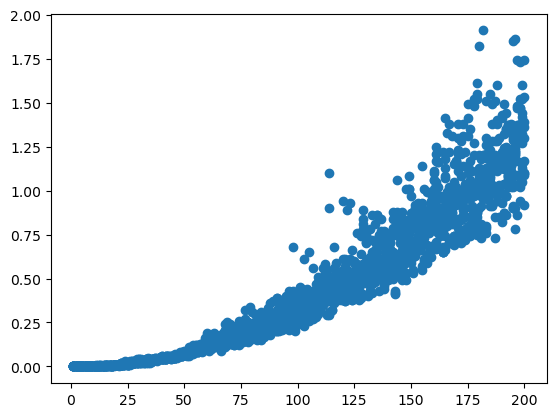

In [20]:
import matplotlib.pyplot as plt
plt.scatter(prob_sizes, total)
plt.show()

In [21]:
result = dict()
sz = df['pb size']
total_time = df[' total time']
nodes = df[' nodes expanded']
plans_lengths = df[' plan length']
for i, size in enumerate(sz):
    if size in result:
        result[size]['time'].append(total_time[i])
        result[size]['nodes'].append(nodes[i])
        result[size]['length'].append(plans_lengths[i])
    else:
        result[size] = dict()
        result[size]['time'] = [total_time[i]]
        result[size]['nodes'] = [nodes[i]]
        result[size]['length'] = [plans_lengths[i]]

In [22]:
result

{1: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [10, 7, 10, 12, 10, 11, 13, 10, 10, 10],
  'length': [12, 9, 10, 13, 12, 15, 12, 9, 12, 10]},
 2: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [11, 8, 13, 9, 13, 11, 6, 7, 6, 8],
  'length': [9, 9, 11, 11, 11, 10, 8, 9, 8, 9]},
 3: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [12, 11, 8, 10, 13, 8, 11, 13, 10, 7],
  'length': [12, 13, 10, 10, 12, 10, 13, 15, 10, 8]},
 4: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [10, 10, 12, 8, 4, 9, 12, 9, 9, 10],
  'length': [11, 9, 14, 9, 5, 8, 14, 9, 11, 9]},
 5: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [11, 11, 12, 7, 11, 10, 11, 12, 11, 11],
  'length': [11, 13, 14, 9, 12, 9, 11, 13, 12, 13]},
 6: {'time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'nodes': [13, 7, 13, 11, 7, 15, 9, 7, 7, 12],
  'length': [14, 8, 14, 12, 8, 17, 9, 8, 7, 11]},
 7: {

In [23]:
num_result = dict()
node_result = dict()
length_result = dict()
for k, v in result.items():
    try:
        new_v = [float(ele) for ele in v['time']]
        num_result[k] = new_v
        node_result[k] = v['nodes']
        length_result[k] = v['length']
    except:
        print(k, v)
    

In [24]:
length_result

{1: [12, 9, 10, 13, 12, 15, 12, 9, 12, 10],
 2: [9, 9, 11, 11, 11, 10, 8, 9, 8, 9],
 3: [12, 13, 10, 10, 12, 10, 13, 15, 10, 8],
 4: [11, 9, 14, 9, 5, 8, 14, 9, 11, 9],
 5: [11, 13, 14, 9, 12, 9, 11, 13, 12, 13],
 6: [14, 8, 14, 12, 8, 17, 9, 8, 7, 11],
 7: [9, 12, 11, 10, 11, 13, 11, 15, 12, 11],
 8: [12, 13, 8, 8, 17, 11, 14, 12, 9, 8],
 9: [11, 11, 7, 11, 13, 13, 13, 12, 12, 15],
 10: [13, 15, 5, 13, 10, 14, 14, 10, 14, 10],
 11: [12, 13, 15, 13, 11, 12, 13, 15, 13, 10],
 12: [10, 14, 10, 12, 11, 10, 12, 10, 10, 10],
 13: [12, 10, 13, 13, 11, 14, 9, 12, 9, 9],
 14: [14, 12, 12, 10, 10, 13, 12, 13, 12, 10],
 15: [13, 14, 13, 13, 12, 13, 9, 14, 13, 8],
 16: [12, 11, 12, 9, 12, 9, 12, 5, 14, 9],
 17: [13, 11, 12, 7, 11, 12, 11, 14, 10, 9],
 18: [12, 12, 11, 6, 11, 11, 10, 10, 10, 13],
 19: [11, 13, 13, 11, 3, 15, 13, 9, 11, 13],
 20: [16, 14, 10, 11, 10, 13, 9, 9, 10, 14],
 21: [10, 5, 13, 15, 17, 15, 10, 13, 14, 9],
 22: [12, 9, 14, 12, 9, 13, 13, 9, 13, 12],
 23: [9, 11, 11, 10, 12, 

In [26]:
import json
file = open('satellite_experiment_result_1_200.json')
htn = json.load(file)
htn

{'1': {'0': [0.00830984115600586, 12, 18],
  '1': [0.0034761428833007812, 8, 12],
  '2': [0.00695490837097168, 13, 19],
  '3': [0.007251262664794922, 15, 21],
  '4': [0.007266998291015625, 11, 16],
  '5': [0.004915952682495117, 13, 19],
  '6': [0.00690007209777832, 14, 18],
  '7': [0.00394892692565918, 11, 16],
  '8': [0.005881071090698242, 11, 16],
  '9': [0.008130073547363281, 13, 19]},
 '2': {'0': [0.005811929702758789, 12, 16],
  '1': [0.0055353641510009766, 9, 19],
  '2': [0.007696866989135742, 13, 17],
  '3': [0.007030963897705078, 11, 16],
  '4': [0.007245063781738281, 13, 17],
  '5': [0.005134105682373047, 10, 17],
  '6': [0.0034651756286621094, 7, 11],
  '7': [0.004266023635864258, 9, 12],
  '8': [0.003416776657104492, 7, 11],
  '9': [0.004469156265258789, 8, 10]},
 '3': {'0': [0.0073909759521484375, 14, 19],
  '1': [0.009131908416748047, 14, 21],
  '2': [0.0036361217498779297, 9, 12],
  '3': [0.007239818572998047, 12, 17],
  '4': [0.00776982307434082, 15, 20],
  '5': [0.00366

In [27]:
# num_result = dict()
# node_result = dict()
# length_result = dict()
htn_result = dict()
htn_node_result = dict()
htn_length_result = dict()

for k, v in htn.items():
    time, expand, length = [], [], []
    for k1, v1 in v.items():
        time.append(v1[0])
        length.append(v1[1])
        expand.append(v1[2])
    htn_result[k] = time
    htn_node_result[k] = expand
    htn_length_result[k] = length
    


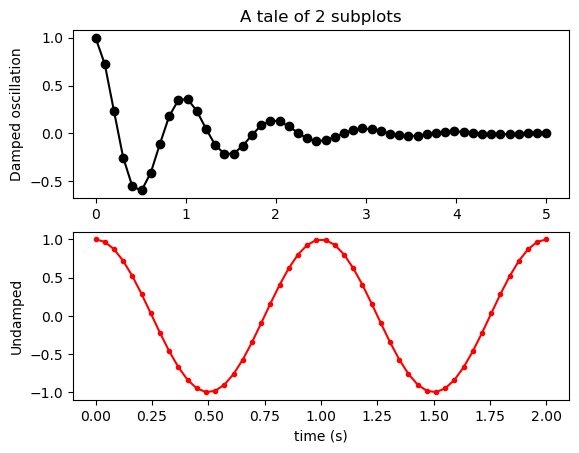

In [28]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'ko-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')


plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

In [29]:
htn_length_result['1']

[12, 8, 13, 15, 11, 13, 14, 11, 11, 13]

# Calculate the median and mean runtime

In [30]:
import statistics
problem_size = []
median, mean, maximum, minimum = [], [], [], []
metric_median, metric_mean, metric_maximum, metric_minimum = [], [], [], []
metric_length_median, metric_length_mean, metric_length_maximum, metric_length_minimum = [], [], [], []

htn_median, htn_mean, htn_maximum, htn_minimum = [], [], [], []
htn_node_median, htn_node_mean, htn_node_maximum, htn_node_minimum = [], [], [], []
htn_length_median, htn_length_mean, htn_length_maximum, htn_length_minimum = [], [], [], []
for k, v in num_result.items():
    problem_size.append(k)
    median.append(statistics.median(v))
    mean.append(statistics.mean(v))
    maximum.append(max(v))
    minimum.append(min(v))
    metric_median.append(statistics.median(node_result[k]))
    metric_mean.append(statistics.mean(node_result[k]))
    metric_maximum.append(max(node_result[k]))
    metric_minimum.append(min(node_result[k]))
    
    metric_length_median.append(statistics.median(length_result[k]))
    metric_length_mean.append(statistics.mean(length_result[k]))
    metric_length_maximum.append(max(length_result[k]))
    metric_length_minimum.append(min(length_result[k]))
    
    htn_median.append(statistics.median(htn_result[str(k)]))
    htn_mean.append(statistics.mean(htn_result[str(k)]))
    htn_maximum.append(max(htn_result[str(k)]))
    htn_minimum.append(min(htn_result[str(k)]))
    
    htn_node_median.append(statistics.median(htn_node_result[str(k)]))
    htn_node_mean.append(statistics.mean(htn_node_result[str(k)]))
    htn_node_maximum.append(max(htn_node_result[str(k)]))
    htn_node_minimum.append(min(htn_node_result[str(k)]))
    
    htn_length_median.append(statistics.median(htn_length_result[str(k)]))
    htn_length_mean.append(statistics.mean(htn_length_result[str(k)]))
    htn_length_maximum.append(max(htn_length_result[str(k)]))
    htn_length_minimum.append(min(htn_length_result[str(k)]))
    
    

In [31]:
metric_std = [np.std(v) for k, v in num_result.items()]
htn_std = [np.std(v) for k, v in htn_result.items()]

/var/folders/xq/1kk_rbdx02db5wnrjs1lsrb80000gn/T/ipykernel_32096/1289812780.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(problem_size, metric_mean, yerr=metric_std, fmt='o', capsize=5, ecolor='red', marker='s', mfc='blue', mec='blue', ms=1, linestyle='--', lw=0.5, label='MetricFF')
/var/folders/xq/1kk_rbdx02db5wnrjs1lsrb80000gn/T/ipykernel_32096/1289812780.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(problem_size, htn_mean, yerr=htn_std, fmt='o', capsize=5, ecolor='green', marker='o', mfc='orange', mec='orange', ms=1, linestyle='-', lw=0.5, label='Modified HTN')


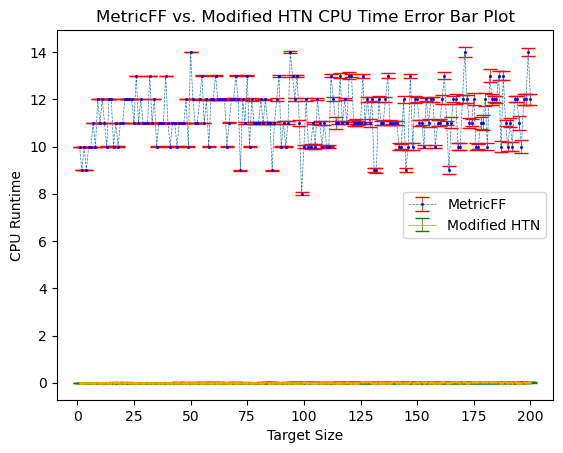

In [66]:
# Plot error bar now
import matplotlib.pyplot as plt
import numpy as np



# Create the error bar plot for y1
plt.errorbar(problem_size, metric_mean, yerr=metric_std, fmt='o', capsize=5, ecolor='red', marker='s', mfc='blue', mec='blue', ms=1, linestyle='--', lw=0.5, label='MetricFF')

# Create the error bar plot for y2
plt.errorbar(problem_size, htn_mean, yerr=htn_std, fmt='o', capsize=5, ecolor='green', marker='o', mfc='orange', mec='orange', ms=1, linestyle='-', lw=0.5, label='Modified HTN')

# Customize the plot
plt.xlabel('Target Size')
plt.ylabel('CPU Runtime')
plt.title('MetricFF vs. Modified HTN CPU Time Error Bar Plot')
plt.legend()
plt.savefig('runtime_error.png')
# Display the plot
plt.show()

In [47]:
j = [6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
for ele in j:
    print(htn_length_mean[ele-1])

11
11.9
12.3
12.3
12.3
11.1
11.8
12.5
13.333333333333334
13.5


In [48]:
mean[23]

0.019

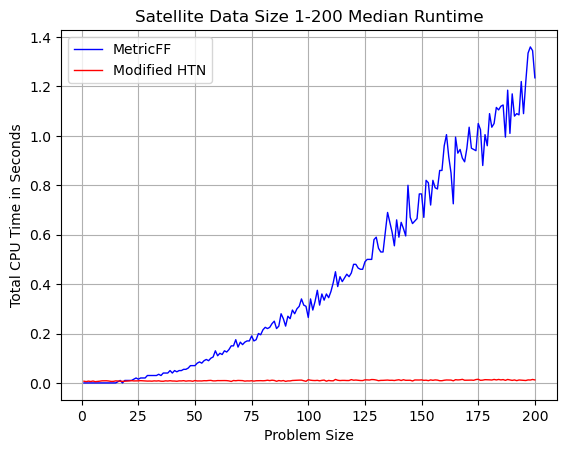

In [67]:
import matplotlib.pyplot as plt
plt.title("Satellite Data Size 1-200 Median Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

plt.plot(problem_size, median, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_median, color='red', linewidth = 1,  label = 'Modified HTN')
# show a legend on the plot
plt.legend()

# plt.plot(problem_size, median)
plt.grid()
plt.savefig('st_median_runtime.png')
plt.show()

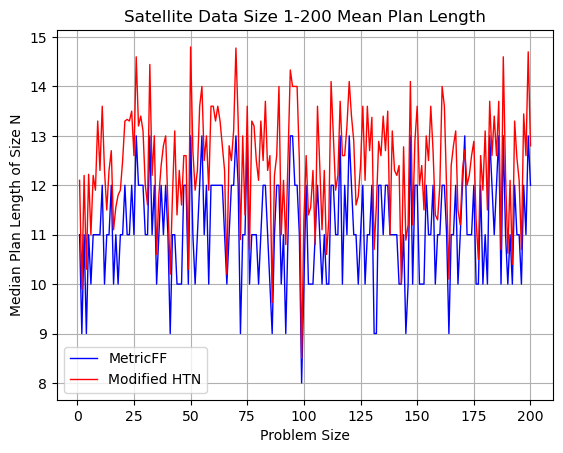

In [68]:
plt.title("Satellite Data Size 1-200 Mean Plan Length")
plt.xlabel("Problem Size")
plt.ylabel("Median Plan Length of Size N")

plt.plot(problem_size, metric_length_mean, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_length_mean, color='red', linewidth = 1,  label = 'Modified HTN')
# show a legend on the plot
plt.legend()

# plt.plot(problem_size, median)
plt.grid()
plt.savefig('st_length_mean.png')
plt.show()

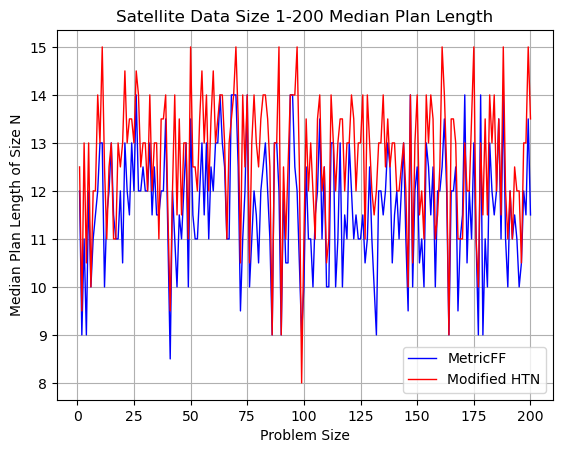

In [72]:
plt.title("Satellite Data Size 1-200 Median Plan Length")
plt.xlabel("Problem Size")
plt.ylabel("Median Plan Length of Size N")

plt.plot(problem_size, metric_length_median, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_length_median, color='red', linewidth = 1,  label = 'Modified HTN')
# show a legend on the plot
plt.legend()

# plt.plot(problem_size, median)
plt.grid()
plt.savefig('st_length_median.png')
plt.show()

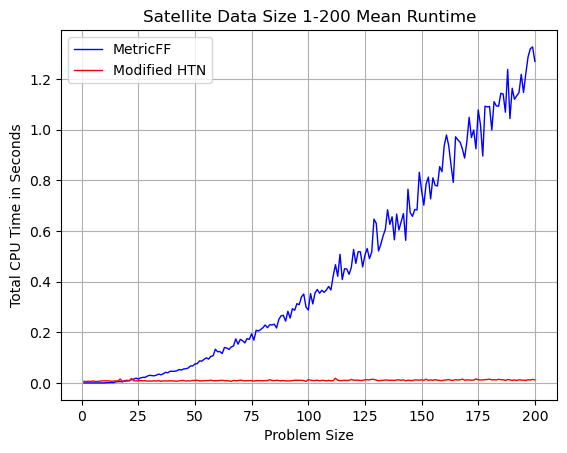

In [69]:
plt.title("Satellite Data Size 1-200 Mean Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

# plt.plot(problem_size, mean)
plt.plot(problem_size, mean, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_mean, color='red', linewidth = 1,  label = 'Modified HTN')
plt.legend()
plt.grid()
plt.savefig('st_mean_runtime.png')
plt.show()

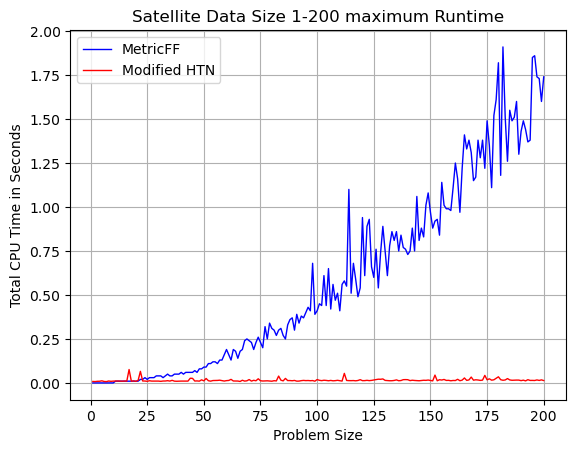

In [70]:
plt.title("Satellite Data Size 1-200 maximum Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

# plt.plot(problem_size, maximum)
plt.plot(problem_size, maximum, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_maximum, color='red', linewidth = 1,  label = 'Modified HTN')
plt.legend()
plt.grid()
plt.savefig('st_maximum.png')
plt.show()

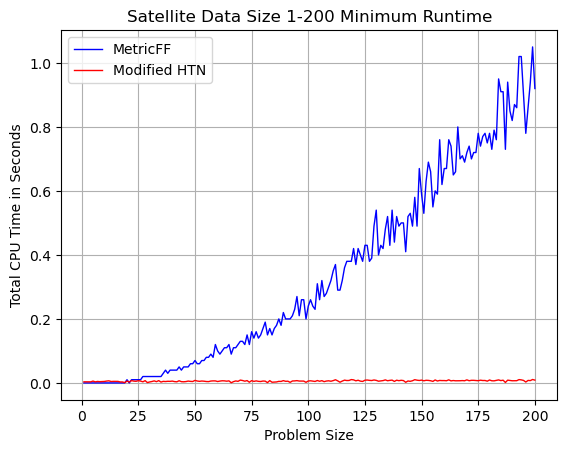

In [71]:
plt.title("Satellite Data Size 1-200 Minimum Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

# plt.plot(problem_size, minimum)
plt.plot(problem_size, minimum, color='blue', linewidth = 1,  label = 'MetricFF')
plt.plot(problem_size, htn_minimum, color='red', linewidth = 1,  label = 'Modified HTN')
plt.legend()
plt.grid()
plt.savefig('st_minimum_runtime.png')
plt.show()

In [40]:
import statistics
problem_size = []
median, mean = [], []
for k, v in result.items():
    problem_size.append(k)
    median.append(statistics.median(v))
    mean.append(statistics.mean(v))

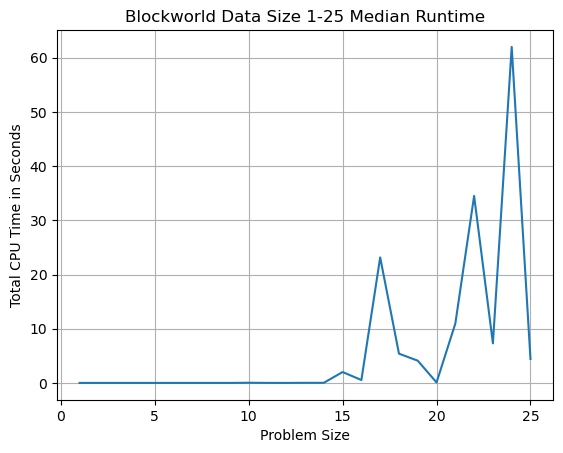

In [37]:
plt.title("Blockworld Data Size 1-25 Median Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

plt.plot(problem_size, median)
plt.grid()
plt.savefig('bw')
plt.show()

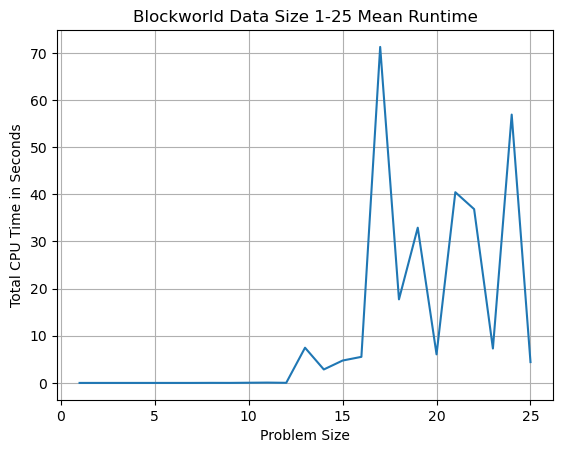

In [42]:
plt.title("Blockworld Data Size 1-25 Mean Runtime")
plt.xlabel("Problem Size")
plt.ylabel("Total CPU Time in Seconds")

plt.plot(problem_size, mean)
plt.grid()
plt.savefig('bw_mean')
plt.show()

In [31]:
from plotnine import *
def plot(data, xlabel, ylabel, title):
    data_long = pd.melt(data, id_vars=['k'], var_name='CPU Time', value_name='perplexity')

    # Create line plot
    return ggplot(data_long, aes(x='k', y='perplexity', color='model', group='model')) \
        + geom_line() \
        + xlab(xlabel) \
        + ylab(ylabel) \
        + ggtitle(title) \
        + theme_minimal()
    

/Users/zongxiali/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zongxiali/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: plotnine-save-8795218689208.pdf


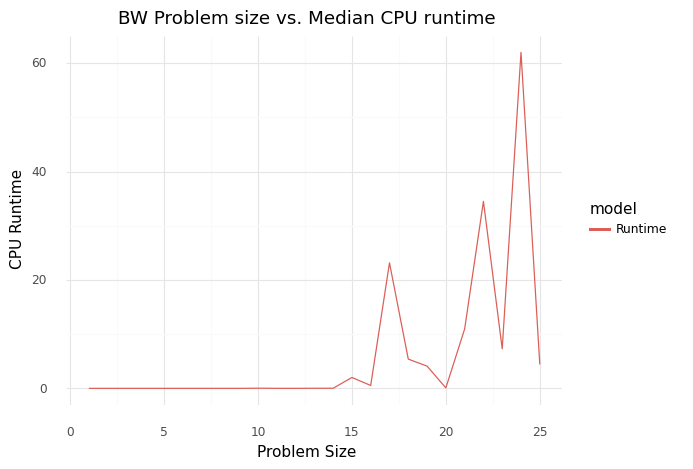

<ggplot: (8795218689208)>

In [38]:
data = pd.DataFrame({
    'k': problem_size,
    'Runtime': median
})

plot_res = plot(data, 'Problem Size', 'CPU Runtime', 'BW Problem size vs. Median CPU runtime')
ggsave(plot_res,file='Training_accuracy.png')
plot_res

/Users/zongxiali/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/zongxiali/opt/anaconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: plotnine-save-8795218435591.pdf


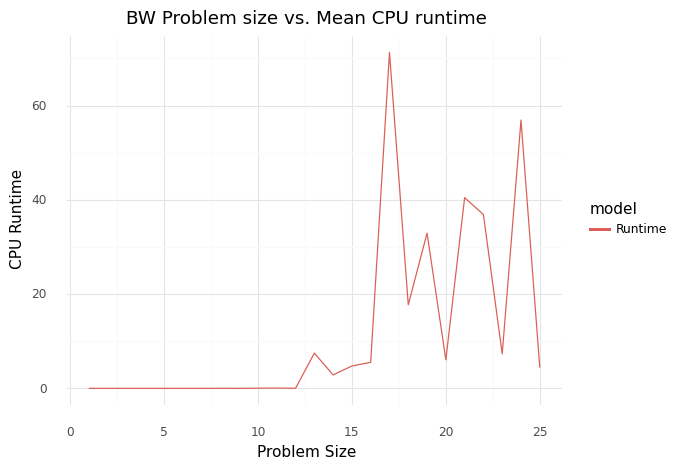

<ggplot: (8795218435591)>

In [41]:
data = pd.DataFrame({
    'k': problem_size,
    'Runtime': mean
})

plot_res = plot(data, 'Problem Size', 'CPU Runtime', 'BW Problem size vs. Mean CPU runtime')
ggsave(plot_res,file='Training_accuracy.png')
plot_res

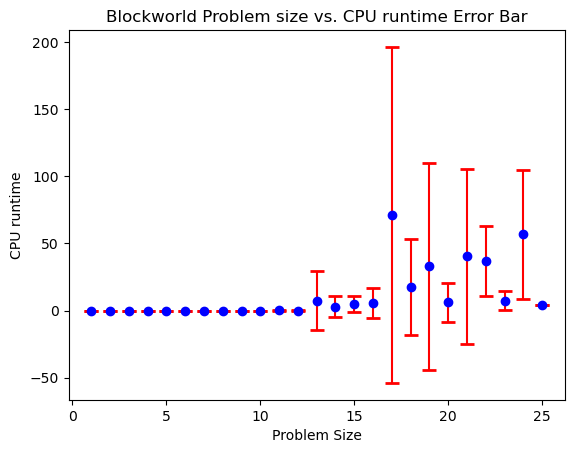

In [44]:
import numpy as np
x = []
y = []
yerr = []

for key, values in result.items():
    x.append(key)
    y.append(np.mean(values))
    yerr.append(np.std(values))

# Plot the error bars
plt.errorbar(x, y, yerr=yerr, fmt='o', capsize=5, capthick=2, ecolor='red', markerfacecolor='blue', markeredgecolor='blue')

# Customize the plot
plt.xlabel('Problem Size')
plt.ylabel('CPU runtime')
plt.title('Blockworld Problem size vs. CPU runtime Error Bar')

# Display the plot
plt.show()